# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

Attributes of the original data
The original data was given in two data sets. The first data sets contains the ID of 249 mice, and shows the tumour volume and number of metastases for each mouse at various points in time. Each mouse is not followed up for the same amount of time, this indicates that the mouse has either died or has been lost to follow up ie the data set was incomplete for that mouse.
The second database called 'metadata', gives the treatment regimen for each mouse as well as the age, sex and weight of the mouse. 9 chemotherapeutic agents were used on the mice in addition to a control (placebo) group. 

Preparing the Data
The first dataset was merged with the second dataset using a many-to-one "inner"join based on the "Mouse ID" column. The data was subsequently cleaned and one duplicate entry was found which was deleted. 

Summary statistics of the Data
The average tumor volume as a group, for all the mice treated for each specific drug regimen was calculated. It revealed that the lowest average tumor volume was at 40.2mm3 for the drug Ramicane.
Propiva had the least number of observed total timepoints for the mice it was used to treat. This suggests the the mice died early for this drug. Capomulin and Ramicaine had the highest total timepoints, suggesting that these mice lived longer. This also correlates with the overall lowest average tumour volume for both Ramicane and Capomulin. 
A pie chart was created showing near equal ratio of male and female mice. 
A linear plot of the tumor volume of a singular test specimen (mouse) was created showing the tumor volume generally showed a decrease in volume with some rebound in tumor growth. It would be of interest to correlate this growth pattern with the dosage pattern of the chemotherapeutic agent. 

Finally a scatter graph was created and regression analysis performed on this. A strong correlation (+0.84) was found between initial weight of the mouse and the mean average tumor volume growth. 

Recommendations for further analysis. 
Data was provided on the number of metastases but this has not been analysed. The working hypothesis would be that the number of metastases was highest in the poorest performing drug regimens, and vice verse. This would be an avenue for further analysis. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = "inner")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
#EXTRA CELLretrieve the column names for metadata dataset
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [4]:
#EXTRA CELL retrieve the column names
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [5]:
# Checking the number of mice.
mice_count = len(mouse_metadata["Mouse ID"])
print("Total number of mice in the study:", mice_count)


Total number of mice in the study: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']
duplicate_mouse_ids

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [7]:
#extra celll - Identifying all the duplicated rows
duplicates = combined_data[combined_data.duplicated()]
duplicate_df = pd.DataFrame(duplicates)
duplicate_df
#print(duplicates)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [8]:
# Optional: Get all the data for the duplicate mouse ID ie ID g989 in column [0]
g989_mousedata = combined_data.loc[(combined_data["Mouse ID"] == "g989")]
g989_mousedata
#my index is different to their but the data is the same

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# use the .isin function
clean_study_data_complete = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [11]:
clean_study_data_complete.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [13]:
#Used .groupby function to group all mice treated with the same drug and call this data as regimens_grouped_data
regimens_grouped_data = clean_study_data_complete.groupby("Drug Regimen")

#use the regimens_data to then calculate statistics for the Tumour Volume (using the American spelling!)
mean_tumor_volume = regimens_grouped_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = regimens_grouped_data["Tumor Volume (mm3)"].median()
var_tumor_volume = regimens_grouped_data["Tumor Volume (mm3)"].var()
stddev_tumor_volume = regimens_grouped_data["Tumor Volume (mm3)"].std()
sem_tumor_volume = regimens_grouped_data["Tumor Volume (mm3)"].sem()

# assemble the data frame with the above information

summary_stats_regimen_tumor_df = pd.DataFrame({
                                                        "Mean Tumor Volume" : mean_tumor_volume,
                                                        "Median Tumor Volume" : median_tumor_volume,
                                                        "Tumor Volume Variance" : var_tumor_volume,
                                                        "Tumor Volume Std.Dev " : stddev_tumor_volume,
                                                        "Tumor Volume Std Err" : sem_tumor_volume
                                                      })
    
summary_stats_regimen_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimens_grouped_data.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
#retireve all of the drug regimens to use for the x-axis
mouse_metadata["Drug Regimen"].unique()


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#regimens_grouped_data.value_counts()

In [19]:
#retrieve the total number of time points
#clean_study_data_complete["Drug Regimen"].values_count()
counts = clean_study_data_complete['Drug Regimen'].value_counts()
print(counts)

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


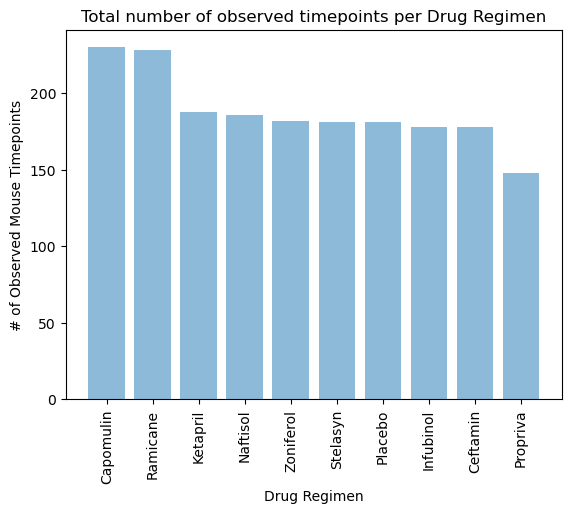

In [192]:

#Define the values for the x and y axis(number of total observations of timepoints)
y_axis = [230,228,188,186,182,181,181,178,178,148]
x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol",  
       "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]

# Tell matplotlib that we will be making a bar chart
plt.bar(x_axis, y_axis, #color='blue', 
        alpha=0.5, align="center")


# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)
plt.xticks(rotation=90)

# Give our chart some labels and a tile
plt.title("Total number of observed timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [32]:
#Data for male vs female mice
counts = clean_study_data_complete['Sex'].value_counts()
print(counts)

Male      958
Female    922
Name: Sex, dtype: int64


In [39]:
# DATA SET for male/female mice
sex = ["Male", "Female"]
percentage = [958, 922]
colors = ["blue", "orange"]


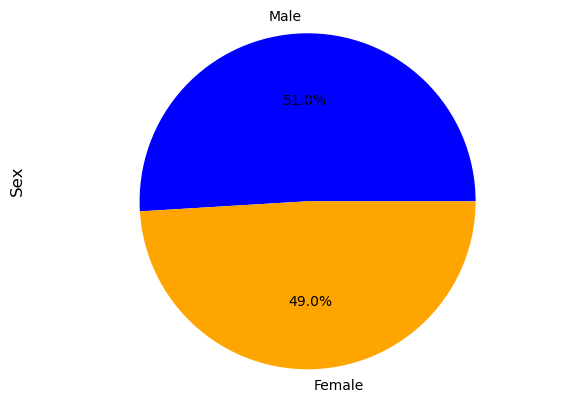

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("Sex", loc='left', rotation='vertical',  y=0.5, x=-0.1)
plt.pie(percentage, labels=sex, colors=colors,
        autopct="%1.1f%%")
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_study_data_complete.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

print(max_tumor)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_df= pd.merge(max_tumor, clean_study_data_complete, on=['Mouse ID','Timepoint'],how="left")
merged_data_df = pd.DataFrame(merged_data_df)
merged_data_df

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [78]:
#Reduce the merged data to only include Volume and regimen
reduced_merged_data_df = merged_data_df[["Tumor Volume (mm3)","Drug Regimen"]]
reduced_merged_data_df

,Tumor Volume (mm3),Drug Regimen
0,67.973419,Infubinol
1,65.525743,Infubinol
2,70.717621,Placebo
3,62.999356,Ceftamin
4,63.440686,Stelasyn
...,...,...
243,48.710661,Propriva
244,30.638696,Ramicane
245,62.754451,Infubinol
246,65.741070,Naftisol


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_df.loc[merged_data_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset ie append the new  
    tumor_vol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


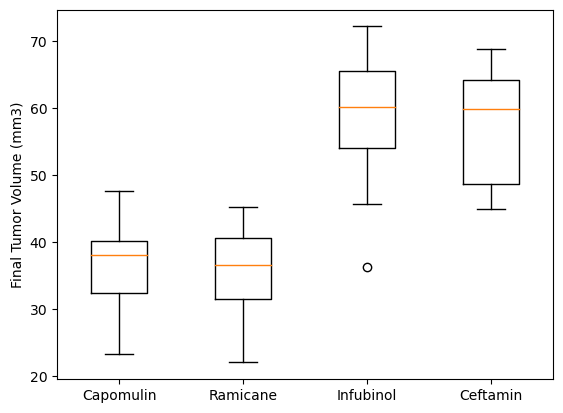

In [107]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol, labels = treatments_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

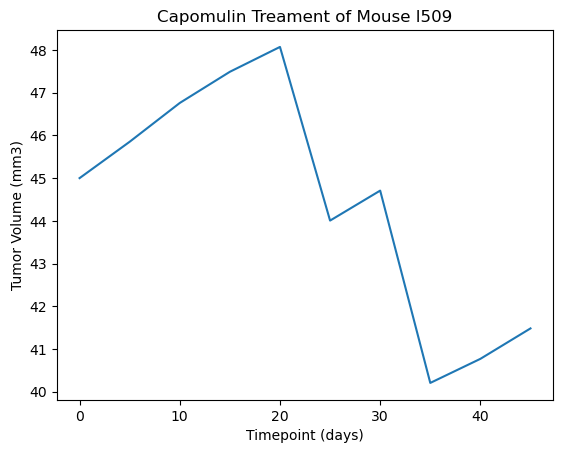

In [117]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = clean_study_data_complete.loc[clean_study_data_complete["Mouse ID"]== "l509", "Timepoint"]
y_axis = clean_study_data_complete.loc[clean_study_data_complete["Mouse ID"]== "l509", "Tumor Volume (mm3)"]

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treament of Mouse l509")

plt.plot(x_axis, y_axis)
plt.show()

In [177]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#retrieve the data for capomulin only, so create new dataframe for capomulin only and return the weights and tumor volumes
capomulin_mice_only = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"]== "Capomulin"]
#, "Weight (g)", "Tumor Volume (mm3)"]
capomulin_mice_only

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [179]:
#reduce the dataframe to only weight and tumor volume
reduced_capomulin_wt_vol_only = capomulin_mice_only[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
reduced_capomulin_wt_vol_only

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,45.000000,22
1,b128,45.651331,22
2,b128,43.270852,22
3,b128,43.784893,22
4,b128,42.731552,22
...,...,...,...
1888,m601,33.118756,17
1889,m601,31.758275,17
1890,m601,30.834357,17
1891,m601,31.378045,17


In [180]:
#for the  x axis we need to group together all the identical mouse weights from the reduced dataframe
grouped_capomulin_weight = reduced_capomulin_wt_vol_only.groupby("Mouse ID")
grouped_capomulin_weight

In [181]:

# for the y axis perform aggregation on the grouped data by finding average of the tumour volume
average_tumor_volume = grouped_capomulin_weight[['Tumor Volume (mm3)', 'Weight (g)']].mean()
average_tumor_volume_df = pd.DataFrame(average_tumor_volume).reset_index()
average_tumor_volume_df



,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


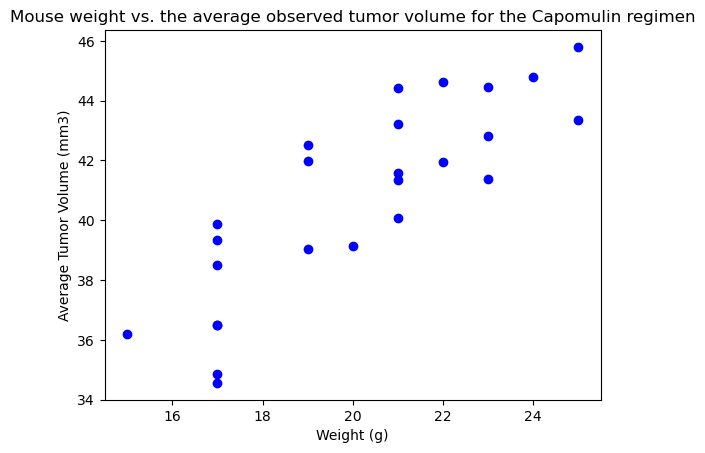

In [182]:
#Create the scatter plot

#for the y axis we need the weight, for the y axis we need mean of the tumor volume for that specific weight.
 #ASK JUSTIN AS SHOULD NOT HAVE TO HARD CODE THESE, ALSO THE WEIGHTS HAVE BEEN AGGREGATED
x_axis = average_tumor_volume_df["Weight (g)"]
y_axis = average_tumor_volume_df["Tumor Volume (mm3)"]
#[36.18, 37.21, 41.18, 39.14, 42.09, 43.29, 43.34, 44.81, 44.06]

plt.title("Mouse weight vs. the average observed tumor volume for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is + 0.84


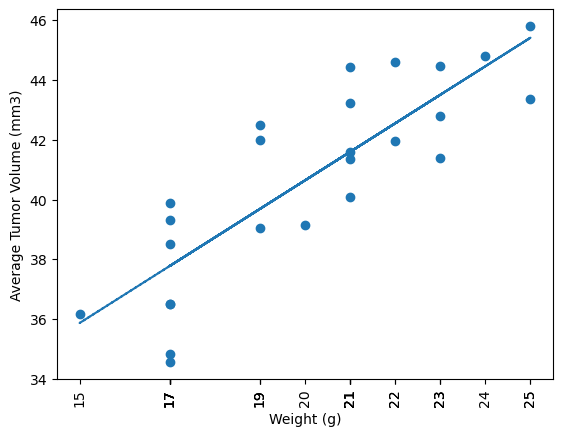

In [191]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# from scipy import stats has already been imported above as st!




d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_axis, y_axis)
d_fit = d_slope * x_axis + d_int
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,d_fit,"--")
plt.xticks(x_axis, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#work out Pearson regression coefficient, we need the ,_ after the naming of the variable, otherwise we will get multiple values. 
#we are only interested in the first value, if we do not do this here then when we reference pearson_coeff we have to use 
#pearson_coeff[0] in order to get the first value
pearson_coeff, _= st.pearsonr(x_axis, y_axis)


print(f'''The correlation between mouse weight and the average tumor volume is + {round(pearson_coeff,2)}''')
plt.show()

    